In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
df = pd.read_csv('/content/diabetes.csv')

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


В этих столбцах нулевое значение не имеет смысла и, таким образом, указывает на отсутствующее значение.

>
* -Glucose
* -BloodPressure
* -SkinThickness
* -Insulin
* -BMI

In [20]:
df_copy = df.copy()

In [22]:
df_copy.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Заменяем значения 0 на NaN

In [25]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [27]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Чтобы заполнить эти значения Nan, необходимо понимать распределение данных.

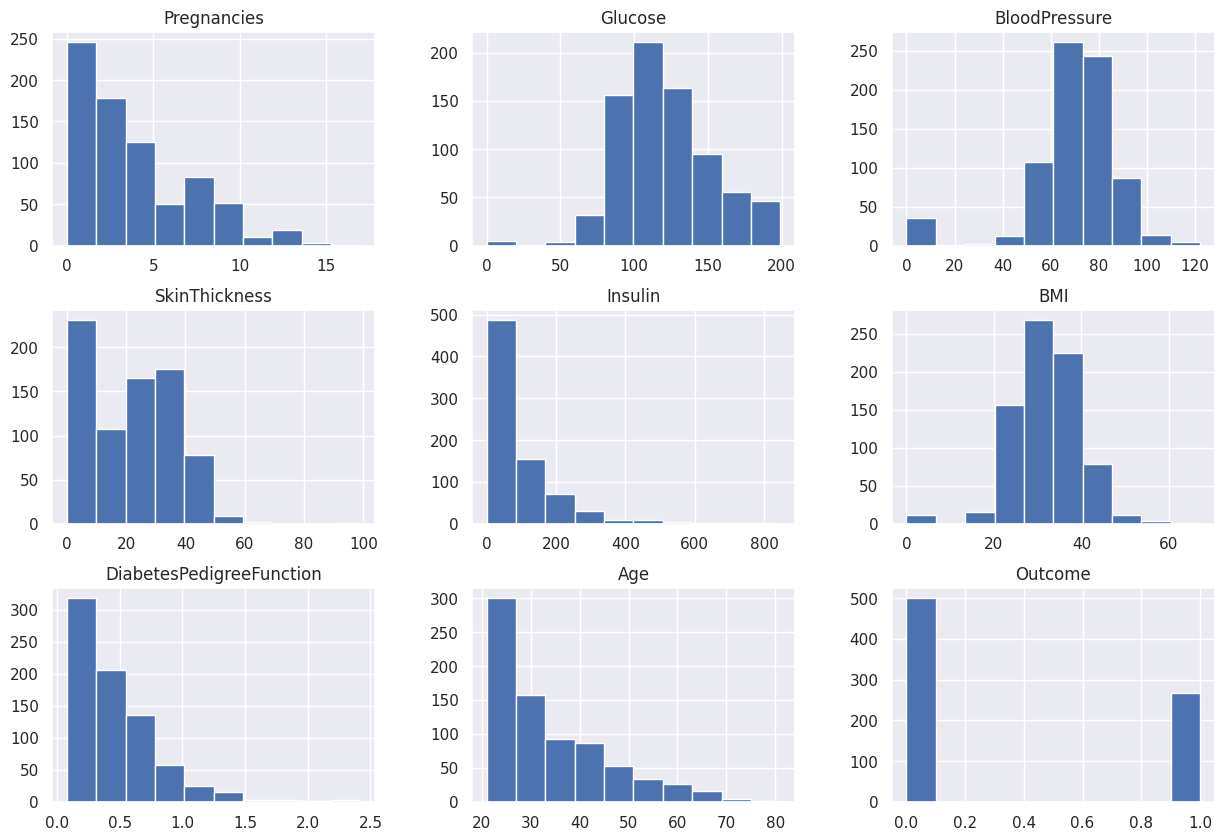

In [57]:
p = df.hist(figsize = (15,10))

Исходя из распределения данных, заменяем NaN на медианы




In [29]:
df_copy['Glucose'].fillna(df_copy['Glucose'].median(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

Смотрим на полученные распредления данных


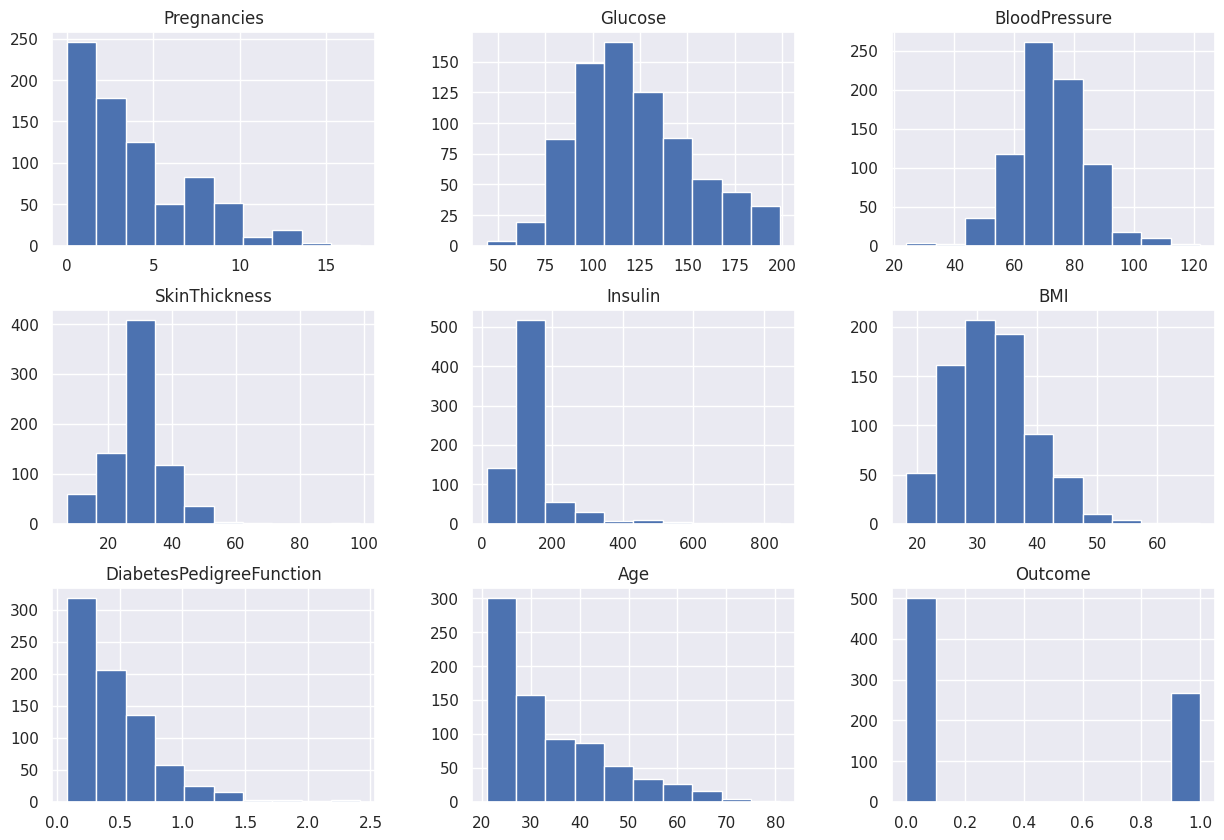

In [58]:
p = df_copy.hist(figsize = (15,10))

In [31]:
df.shape

(768, 9)

In [59]:
df.groupby('Outcome', as_index = False).agg({'Outcome':'count'})

,Outcome
0,500
1,268


В данном датасете количество женщин без диабета, почти в два раза больше, чем с диабетом

In [66]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Процентное соотношение

>Коэффициент корреляции Пирсона: помогает вам выяснить связь между двумя величинами

> Он дает нам показатель силы связи между двумя переменными. Значение коэффициента корреляции Пирсона может находиться в диапазоне от -1 до +1.

> 1 означает, что они сильно коррелируют, а 0 означает отсутствие корреляции.

>Heatmap (Тепловая карта) — это двухмерное представление информации с помощью цветов. Тепловые карты могут помочь пользователю визуализировать простую или сложную информацию.



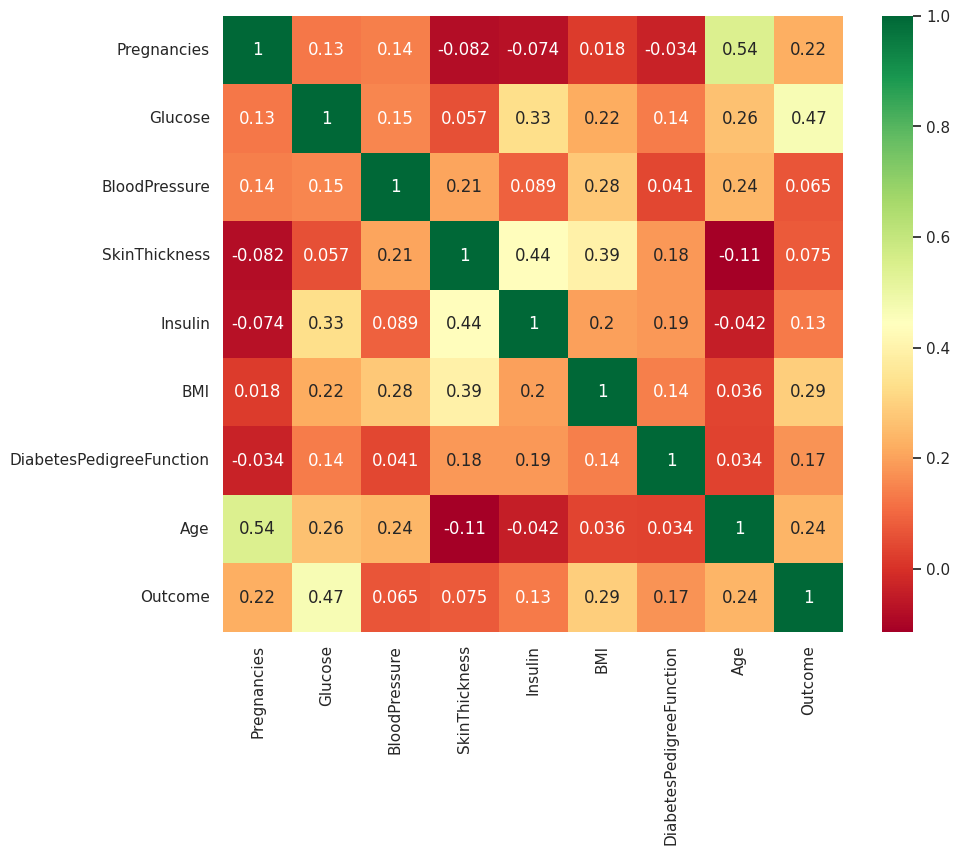

In [53]:
plt.figure(figsize=(10,8))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

Heatmap для очищенных данных

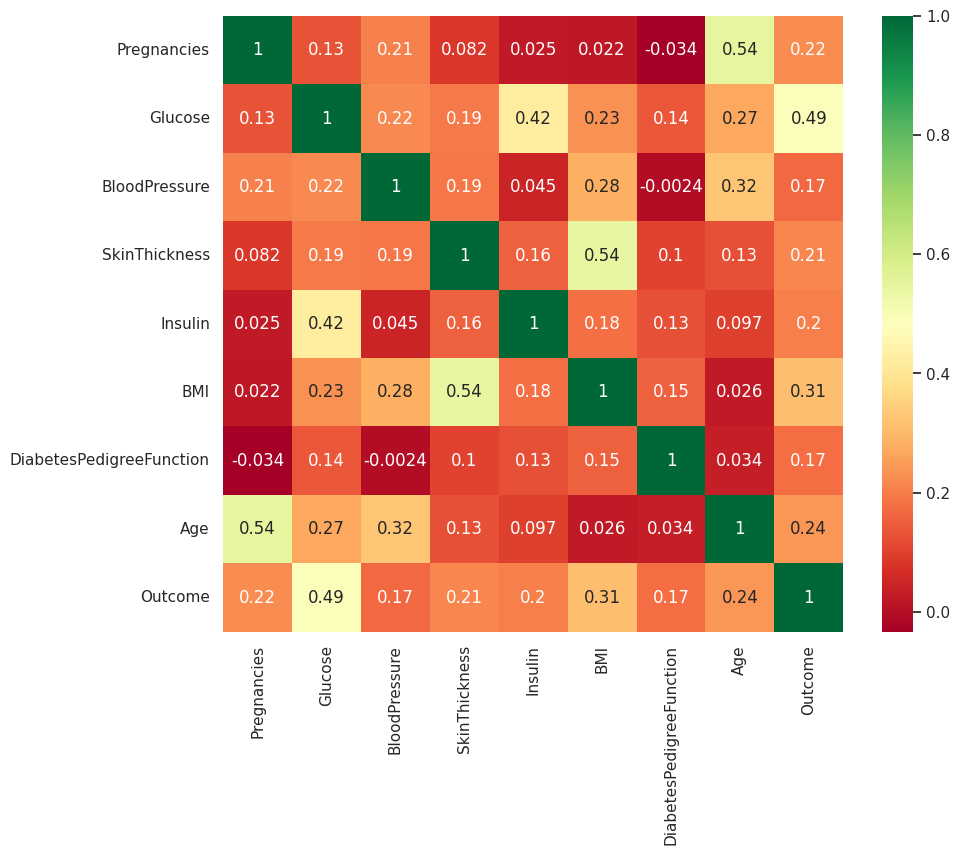

In [52]:
plt.figure(figsize=(10,8))
p=sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')

In [84]:
df_corr_bar = abs(df.corr()['Outcome']).sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation='h', color_discrete_sequence =['#4285f4']*len(df_corr_bar))
fig.update_layout(showlegend=False)
fig.show()

Выводы.  
Глюкоза имеет значение корреляции 0,467.  
Более высокий уровень глюкозы обычно означает более высокий риск развития диабета.

Проверим зависимость толщины кожи и индекса массы тела с наличием диабета

<Axes: xlabel='SkinThickness', ylabel='BMI'>

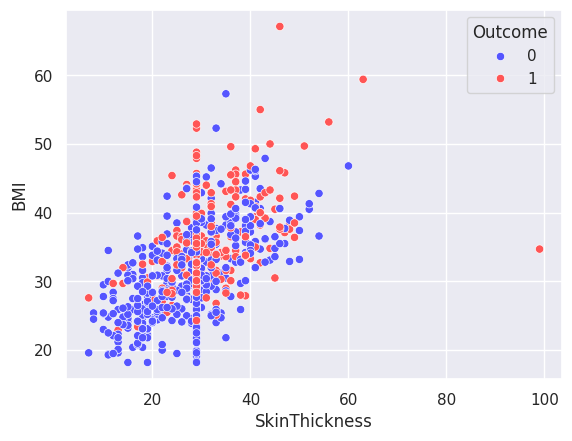

In [87]:
sns.scatterplot(data=df_copy, x="SkinThickness", y="BMI", hue="Outcome", palette='seismic')

Выводы:  

Толщина кожи и ИМТ имеют значение корреляции 0,367.  

Высокая толщина кожи обычно означает более высокий ИМТ.  

Высокий ИМТ означает более высокую вероятность развития диабета (Что можем заметить на графике).

Преобразуем целевой столбец в категориальную переменную

In [69]:
df_copy['Outcome']=df_copy['Outcome'].astype('category')

Давайте посмотрим на целевой столбец, чтобы понять, как данные распределяются между различными значениями.

In [73]:
df_copy.groupby(["Outcome"]).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


**Из приведенной выше группы мы наблюдаем следующее:**.

Среднее значение всех показателей выше у женщин с диабетом по сравнению с женщинами, не страдающими диабетом.

<Axes: xlabel='count', ylabel='Outcome'>

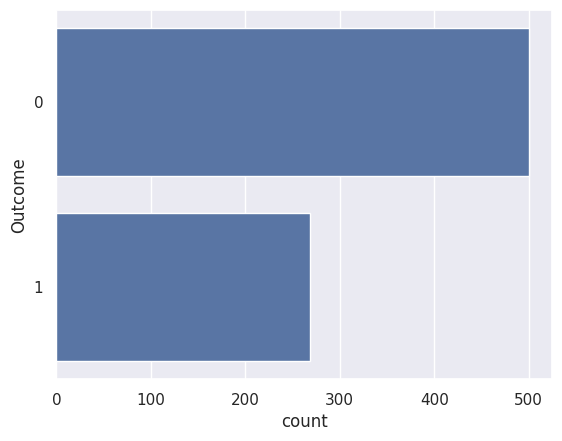

In [72]:
sns.countplot(df_copy['Outcome'])

# Статистические тесты.
Одновыборочный t-критерий.

Нормальный тест на отклонение Z.


H0 – Разница среднего значения между кровеносным давлением выборки и средним значением давления для генеральной совокупности представляет собой статистическое колебание.  

H1 – Разница среднего значения между давлением выборки и средним значением давления для генеральной совокупности значительна. Разница слишком велика, чтобы быть результатом статистических колебаний.

# z-test

In [74]:
# Используется для сравнения среднего значения отдельной выборки со средним значением г/с.
# Условие: количество данных >= 30, должно быть известно среднее и стандартное отклонение генеральной совокупности.
Mu = 72.4
Std = 12.09

sample_avg_bp = np.average(df_copy['BloodPressure'])
std_error_bp = Std / np.sqrt(df_copy.size) # Стандартное отклонение выборочного среднего распределения, рассчитанное на основе генеральной совокупности
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)

# Z_norm_deviate =  sample_mean - population_mean / std_error_bp

Z_norm_deviate = (sample_avg_bp - Mu) / std_error_bp
print("Normal Deviate Z value :" , Z_norm_deviate)

p_value = st.norm.sf(abs(Z_norm_deviate))*2 #с учетом функции выживания
print('p values' , p_value)

if p_value > 0.05:
	print('Выборки, скорее всего, взяты из одних и тех же распределений (не можем отклонить H0)')
else:
	print('Выборки, вероятно, взяты из разных распределений (отклоняем H0)')

Sample Avg BP :  72.38671875
Standard Error:  0.145420099052137
Normal Deviate Z value : -0.09133022248350967
p values 0.9272302042646509
Выборки, скорее всего, взяты из одних и тех же распределений (не можем отклонить H0)


Величина показателя Z намного ниже порогового значения 1,96 при нормальном распределении для 95%.  
Это означает, что H0 не может быть отклонена. Это означает, что данные выборки давления взяты из генеральной совокупности, среднее значение которой составляет 72,4 и
 std = 12.09

# One Sample T-test



In [79]:
# Используется, когда два требования теста Z на нормальное отклонение не могут быть выполнены, т. е. когда среднее значение генеральной совокупности или стандартное отклонение неизвестно

Mu = 72.4
# Std = ?  Стандартное отклонение неизвестно

x = df_copy['BloodPressure']
est_pop_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (df_copy.size - 1))     #  sqrt(sum(xi - Xbar)^2 / (n -1))

sample_avg_bp =(df_copy['BloodPressure']).mean()

std_error_bp = est_pop_std / np.sqrt(df_copy.size) # Стандартное отклонение выборочного среднего распределения, рассчитанное на основе генеральной совокупности

T_Statistic = (( sample_avg_bp - Mu) / std_error_bp)

pvalue = st.t.sf(np.abs(T_Statistic), df_copy.size)*2
print("Estimated Pop Stand Dev" , est_pop_std)
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)
print("T Statistic" , T_Statistic)
print("Pval" , pvalue)

if p_value > 0.05:
	print('Выборки, скорее всего, взяты из одних и тех же распределений (не можем отклонить H0)')
else:
	print('Выборки, вероятно, взяты из разных распределений (отклоняем H0)')

Estimated Pop Stand Dev 4.029879440780779
Sample Avg BP :  72.38671875
Standard Error:  0.04847191624867753
T Statistic -0.2739988642468419
Pval 0.7840936820086353
Выборки, скорее всего, взяты из одних и тех же распределений (не можем отклонить H0)


Величина T-теста очень большая по сравнению с показателем Z, равным 1,96.
Значение P намного больше 0,05.
Отклоняем H0 с уверенностью 95 %
